# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics #used to calculate R^2
import statsmodels.api as sm #stats summary

# Importing dataset


In [2]:
#housepricedata_bost = sklearn.datasets.load_boston()

In [3]:
housepricedata_cali = sklearn.datasets.fetch_california_housing()

In [4]:
print(housepricedata_cali)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

**Generate a more structured dataset by Pandas dataframe**

In [5]:
cali_dataframe = pd.DataFrame(housepricedata_cali.data, columns= housepricedata_cali.feature_names)

In [6]:
cali_dataframe.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


**add a target column(price) to the dataframe**

In [7]:
cali_dataframe['price'] = housepricedata_cali.target

In [8]:
cali_dataframe.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


**missing values check**

In [9]:
cali_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

**statistical measures**

In [10]:
cali_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Finding the correlation


**1. positive**

**2. negative**

In [11]:
correlations = cali_dataframe.corr()
correlations

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


**creating correlation heatmap**

<AxesSubplot:>

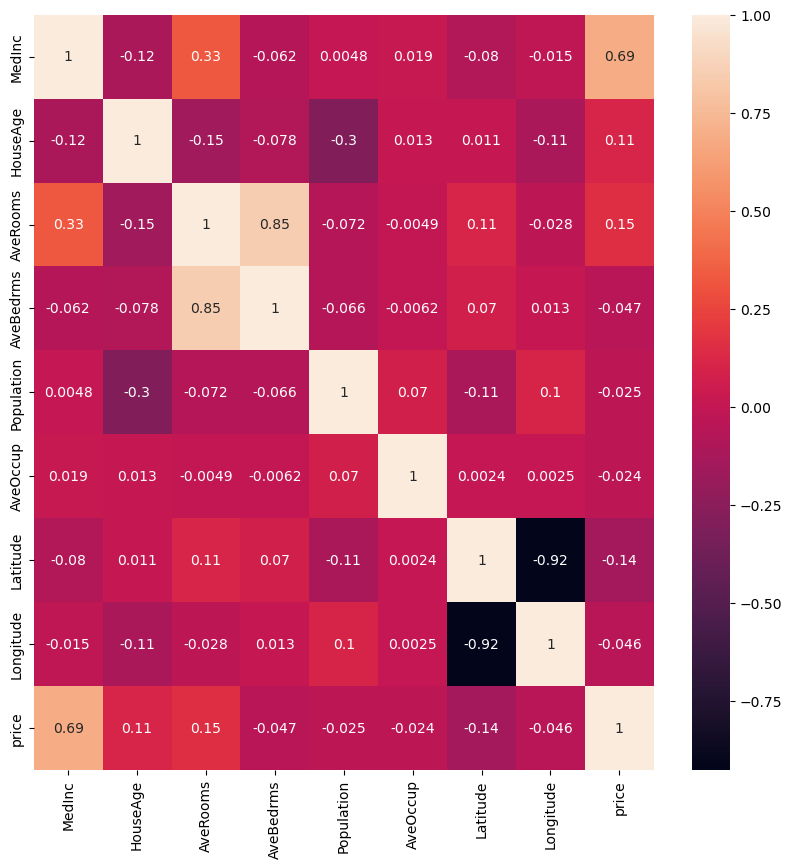

In [12]:
plt.figure(figsize=(10,10), dpi=100)
sns.heatmap(correlations, annot= True)

<AxesSubplot:>

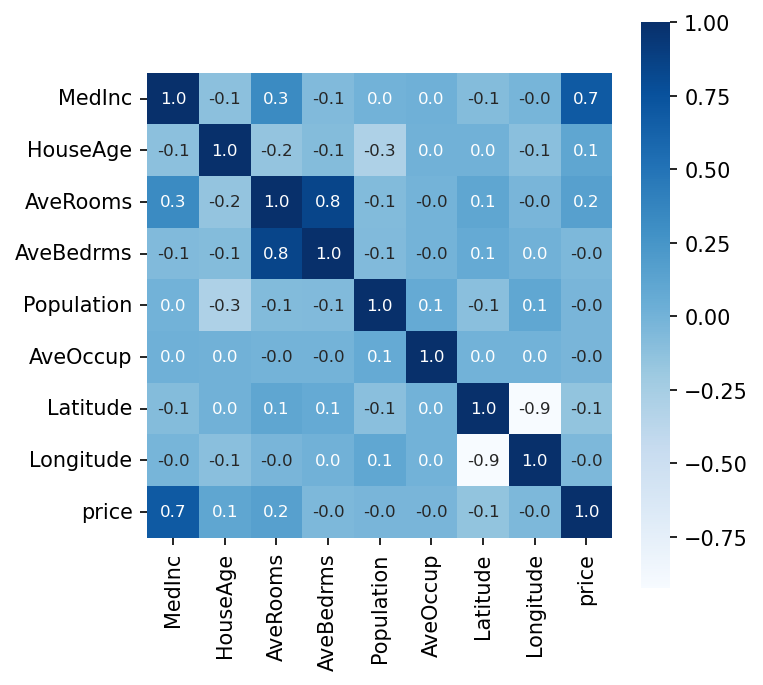

In [13]:
plt.figure(figsize=(5,5), dpi=150)
sns.heatmap(correlations, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap ='Blues')

# Now we split the variables and the target

**target "price" as Y and all other variables as X**

In [14]:
Y = cali_dataframe['price']
X = cali_dataframe.drop(['price'], axis=1)

**export the stats summary table**

In [15]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, Y)
print("coefficients: " + str(regr.coef_))
print()
print("intercept: "+ str(regr.intercept_))

coefficients: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]

intercept: -36.941920207184516


In [16]:
import statsmodels.api as sm #stats summary
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:36:59   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**train_test_split 8:2**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 100)

In [19]:
X.shape

(20640, 8)

In [20]:
X_test.shape

(4128, 8)

In [21]:
X_train.shape

(16512, 8)

**start training the model**

**xgboost regressor**

In [22]:
#loading the xgboost regressor
model = XGBRegressor()

In [23]:
#training the X(variables w/o "price") and Y("price")
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**evaluat the model**


In [24]:
#predicting the X_train
X_train_prediction = model.predict(X_train)

In [25]:
print(X_train_prediction)

[0.92275137 1.9913108  1.150845   ... 1.9301736  1.3257235  2.628973  ]


In [26]:
#R^2
score1 = metrics.r2_score(Y_train, X_train_prediction)

#Mean absolute error
score2 = metrics.mean_absolute_error(Y_train, X_train_prediction)

print("R^2 =", score1)
print("mean absolute error =", score2)

R^2 = 0.9426152449348449
mean absolute error = 0.1960711203514178


In [27]:
#predict on the testing data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

#R^2
score_1 = metrics.r2_score(Y_test, X_test_prediction)

#Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, X_test_prediction)

print("R^2 =", score_1)
print("mean absolute error =", score_2)

[2.1905456  1.2268037  0.9939282  ... 1.7070519  0.94533473 1.1757532 ]
R^2 = 0.8438006697985856
mean absolute error = 0.30442799798229286


# Visualizing the actual price and prediction price

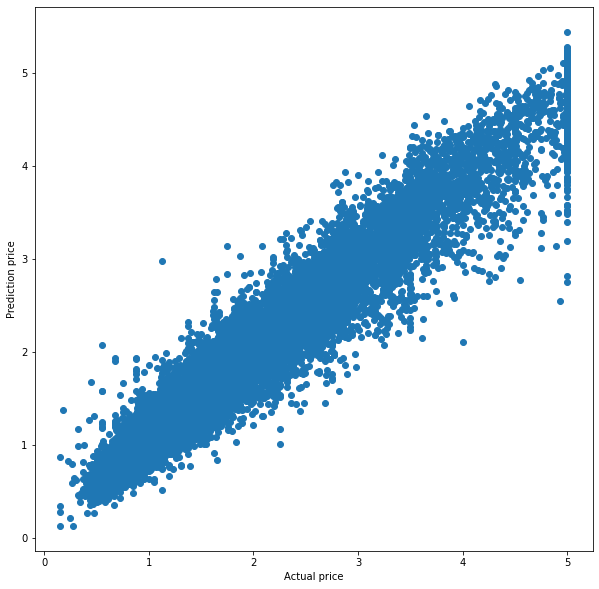

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual price")
plt.ylabel("Prediction price")
plt.show()

## To predict the price of a new house that is not in the dataset using the trained regression model, you would need to provide the same set of input features for the new house as were used to train and test the model

In [31]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [41]:
#Assume that you have a new house with the following features:
# MedInc = 8.0
# HouseAge = 21.0
# AveRooms = 7.5
# AveBedrooms = 1.073446
# Population = 1200
# AveOccup = 2.547945
# Latitude = 37.4
# Longitude = -122.1

# Put the input features into a NumPy array
X_new = np.array([[8.0, 21.0, 7.5, 1.073446, 1200, 2.547945, 37.4, -122.1]])

# Make a prediction on the new data using the trained model
y_new_pred = model.predict(X_new)

# Print the predicted price for the new house
print('Predicted price for the new house:', y_new_pred)
#This code first puts the input features of the new house into a NumPy array called X_new. It then transforms the input features to polynomial features using the same poly object that was used to transform the training and testing sets. Finally, it makes a prediction on the new data using the predict method of the trained polynomial regression model (poly_reg). The predicted price for the new house is then printed to the console.

Predicted price for the new house: [4.5871162]
